# Switch to diffusion map embedding, check alignments

In [1]:
%cd work/notebooks

/home/jovyan/work/notebooks


In [2]:
# Import modules and R
import numpy as np, pandas as pd
from plotnine import *
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

In [3]:
import sys, os
sys.path.append('../code')
from processing_helpers import *
from analysis_helpers import *
from pcaVersion import *
from gradientVersion import *
%R source("../code/Rplots.R");
%R source("../code/brainPlots.R");

In [32]:
pca_hcp_3d_ds8 = gradientVersion(approach='pca', kernel=None).fit('hcp_3donors_ds8')

New gradients version: method=pca, params={}, kernel=None, sparsity=0, data=hcp_3donors_ds8


In [77]:
weights = pca_hcp_3d_ds8.weights.iloc[:,:3]
weights

,0,1,2
A1BG,-0.020371,-0.007198,-0.001004
ABCA6,0.019210,0.001899,0.019861
ABCA9,0.018627,-0.004999,0.011827
ABCC12,-0.005977,0.010285,-0.054655
ABCC5,0.009066,-0.029066,-0.002426
...,...,...,...
ZSCAN18,-0.023085,-0.009438,-0.007998
ZSCAN29,0.016356,0.015582,-0.018844
ZSCAN9,0.019832,-0.012007,-0.009965
ZSWIM4,0.020534,0.004361,-0.007331


In [83]:
from sklearn.decomposition import PCA
exp = pca_hcp_3d_ds8.expression
pca = PCA(n_components=3).fit(exp)

coefs = pd.DataFrame(pca.components_.T, index=exp.columns)
coefs

,0,1,2
A1BG,-0.019914,-0.007082,-0.001012
ABCA6,0.017265,0.001717,0.018405
ABCA9,0.016686,-0.004507,0.010924
ABCC12,-0.005588,0.009679,-0.052694
ABCC5,0.007686,-0.024801,-0.002121
...,...,...,...
ZSCAN18,-0.026088,-0.010734,-0.009320
ZSCAN29,0.014156,0.013572,-0.016816
ZSCAN9,0.018393,-0.011207,-0.009529
ZSWIM4,0.017667,0.003776,-0.006503


In [75]:
# pd.DataFrame(np.corrcoef(pca_hcp_3d_ds8.scores))
scores = pca_hcp_3d_ds8.scores.iloc[:,:3]
corr = np.corrcoef(scores.join(exp).T)[3:,:3]
corrs = pd.DataFrame(corr, index=exp.columns)
corrs

,0,1,2
A1BG,-0.807991,-0.135244,-0.014746
ABCA6,0.761945,0.035672,0.291826
ABCA9,0.738792,-0.093925,0.173775
ABCC12,-0.237055,0.193251,-0.803067
ABCC5,0.359591,-0.546133,-0.035651
...,...,...,...
ZSCAN18,-0.915625,-0.177326,-0.117520
ZSCAN29,0.648735,0.292765,-0.276884
ZSCAN9,0.786626,-0.225601,-0.146425
ZSWIM4,0.814453,0.081932,-0.107712


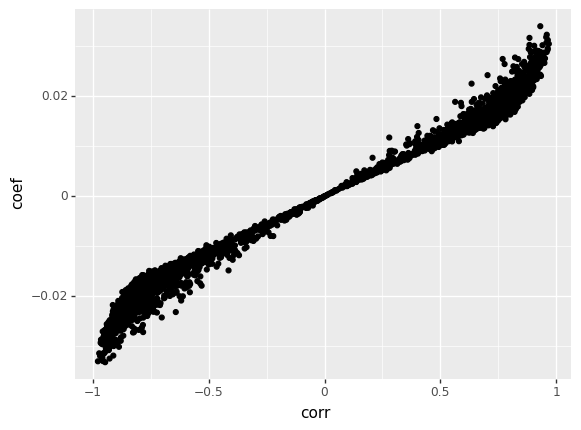

<ggplot: (17591921790040)>

In [103]:
df = pd.concat({'corr':corrs[0], 
           'weight':weights[0],
           'coef':coefs[0]
           },axis=1)

from plotnine import *
ggplot(df) + geom_point(aes(x='corr',y='coef'))

In [42]:
pca_hcp_3d_ds8 = gradientVersion(approach='pca').fit('hcp_3donors_ds8')
pca_hcp_3d_ds9 = gradientVersion(approach='pca').fit('hcp_3donors_ds9')
dm_hcp_ds9 = gradientVersion(approach='dm', kernel='normalized_angle', alpha=1).fit('hcp_ds9')
dm_hcp_3d_ds8 = gradientVersion(approach='dm', kernel='normalized_angle', alpha=1).fit('hcp_3donors_ds8')
dm_hcp_3d_ds5 = gradientVersion(approach='dm', kernel='normalized_angle', alpha=1).fit('hcp_3donors_ds5')

New gradients version: method=pca, kernel=None, data=hcp_3donors_ds8
New gradients version: method=pca, kernel=None, data=hcp_3donors_ds9
New gradients version: method=dm, kernel=normalized_angle, data=hcp_ds9
New gradients version: method=dm, kernel=normalized_angle, data=hcp_3donors_ds8
New gradients version: method=dm, kernel=normalized_angle, data=hcp_3donors_ds5


In [67]:
corrs_dict = {
    'DM,DS9 \nvs \nself': [dm_hcp_ds9, dm_hcp_ds9],
    'PCA,3+,DS8 \nvs \nDM,3+,DS8': [pca_hcp_3d_ds8, dm_hcp_3d_ds8],
    'PCA,3+,DS8 \nvs \nDM,3+,DS5': [pca_hcp_3d_ds8, dm_hcp_3d_ds5],
    'PCA,3+,DS8 \nvs \nDM,DS9': [pca_hcp_3d_ds8, dm_hcp_ds9],
    'DM,3+,DS5 \nvs \nDM,DS9': [dm_hcp_3d_ds5, dm_hcp_ds9]
}
corrs_plot = make_corrs_plot(corrs_dict)

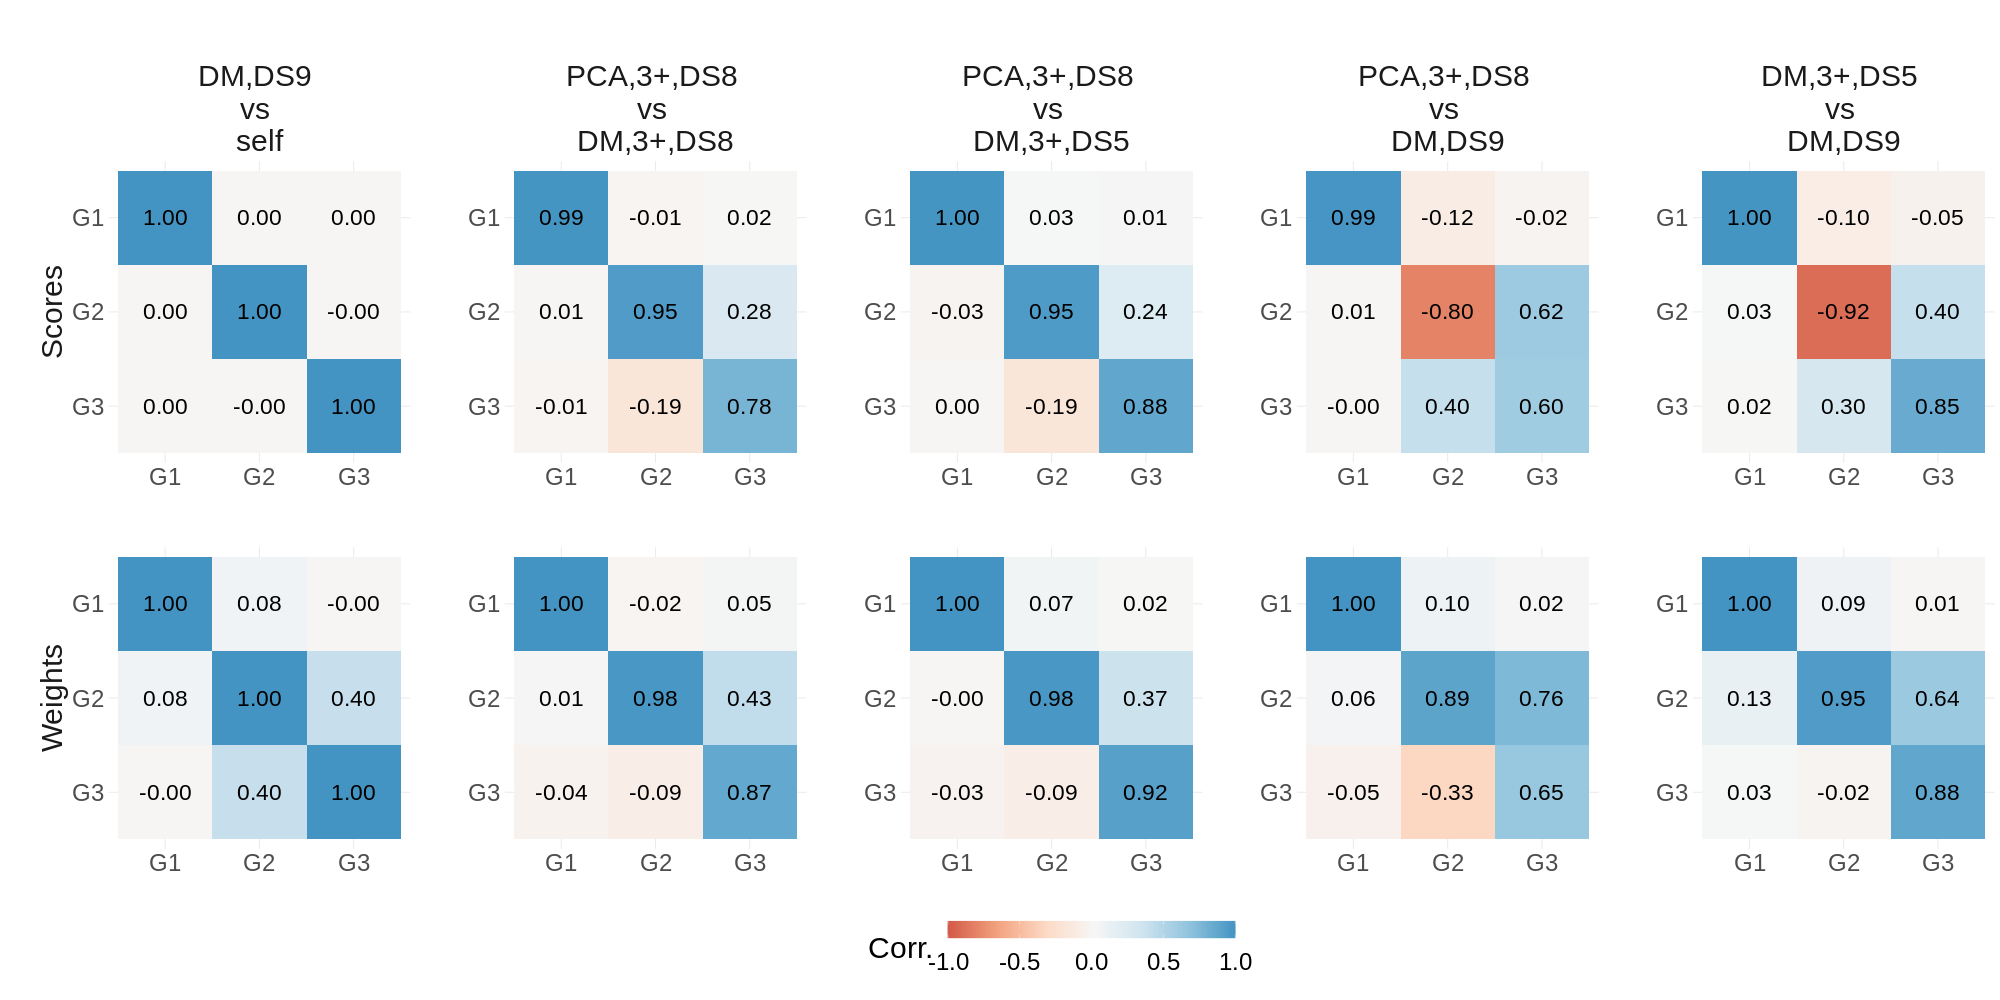

In [68]:
%%R -i corrs_plot -w 2000 -h 1000
source("../code/Rplots.R")
plot_corrs(corrs_plot, facetting='')

In [62]:
pca_dk_ds8 = gradientVersion(approach='pca').fit('dk_ds8')
pca_dk_ds9 = gradientVersion(approach='pca').fit('dk_ds9')
dm_dk_ds8 = gradientVersion(approach='dm', kernel='normalized_angle', alpha=1).fit('dk_ds8')
dm_dk_ds9 = gradientVersion(approach='dm', kernel='normalized_angle', alpha=1).fit('dk_ds9')
dm_dk_ds7 = gradientVersion(approach='dm', kernel='normalized_angle', alpha=1).fit('dk_ds7')

New gradients version: method=pca, kernel=None, data=dk_ds8
New gradients version: method=pca, kernel=None, data=dk_ds9
New gradients version: method=dm, kernel=normalized_angle, data=dk_ds8
New gradients version: method=dm, kernel=normalized_angle, data=dk_ds9
New gradients version: method=dm, kernel=normalized_angle, data=dk_ds7


In [73]:
corrs_dict = {
    # 'PCA,DK,DS9 \nvs \nDM,DK,DS9': [pca_dk_ds9, dm_dk_ds9],
    'PCA,DK,DS8 \nvs \nDM,DK,DS9': [pca_dk_ds8, dm_dk_ds9],
    'PCA,HCP,3+,DS8 \nvs \nPCA,DK,DS8': [pca_hcp_3d_ds8, pca_dk_ds8],
    'PCA,HCP,3+,DS8 \nvs \nDM,DK,DS9': [pca_hcp_3d_ds8, dm_dk_ds9],
    'DM,HCP,DS9 \nvs \nDM,DK,DS9': [dm_hcp_ds9, dm_dk_ds9],
    'DM,HCP,3+,DS5 \nvs \nDM,DK,DS9': [dm_hcp_3d_ds5, dm_dk_ds9],
}
corrs_plot = make_corrs_plot(corrs_dict)

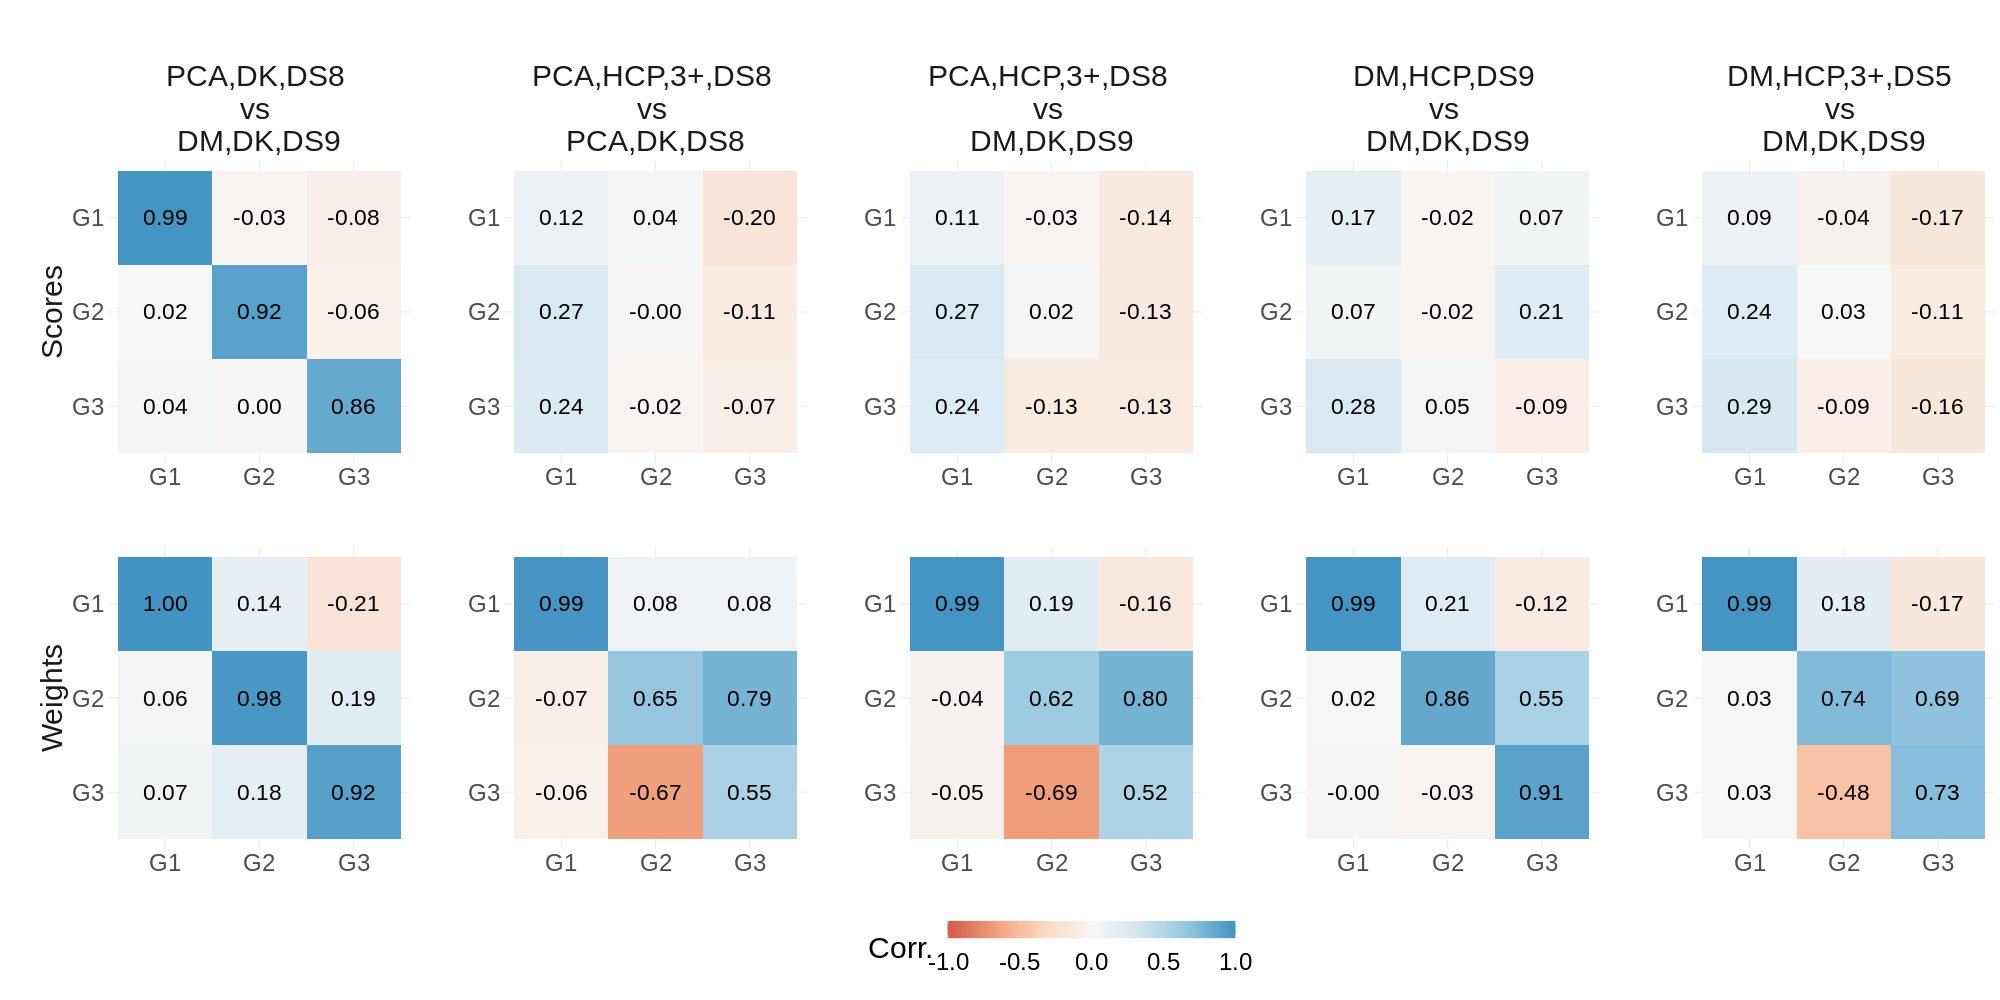

In [74]:
%%R -i corrs_plot -w 2000 -h 1000
source("../code/Rplots.R")
plot_corrs(corrs_plot, facetting='')

In [88]:
# dm_hcp_ds9 = gradientVersion(approach='dm', kernel='normalized_angle', alpha=1).fit('hcp_ds9')
pca_hcp_3d_ds8 = gradientVersion(approach='pca').fit('hcp_3donors_ds8')
pca_hcp_ds9 = gradientVersion(approach='pca').fit('hcp_ds9')

pca_hcp_3d_ds8_coefs = pcaVersion('hcp_3donors_ds8')
pca_hcp_ds9_coefs = pcaVersion('hcp_ds9')

New gradients version: method=pca, kernel=None, data=hcp_3donors_ds8
New gradients version: method=pca, kernel=None, data=hcp_ds9
New PCA version
New PCA version


In [100]:
pca_hcp_3d_ds8_coefs.weights = pca_hcp_3d_ds8_coefs.coefs.T
pca_hcp_ds9_coefs.weights = pca_hcp_ds9_coefs.coefs.T

corrs_dict = {
    'PCA,3+,DS8, \ncoefs vs PLS weights': [pca_hcp_ds9_coefs, pca_hcp_ds9],
    'PCA,DS9, \ncoefs vs PLS weights': [pca_hcp_3d_ds8_coefs, pca_hcp_3d_ds8],
    # 'PCA,3+,DS8 \nvs \nDM,3+,DS5': [pca_hcp_3d_ds8, dm_hcp_3d_ds5],
    # 'PCA,3+,DS8 \nvs \nDM,DS9': [pca_hcp_3d_ds8, dm_hcp_ds9],
    # 'DM,3+,DS5 \nvs \nDM,DS9': [dm_hcp_3d_ds5, dm_hcp_ds9]
}
corrs_plot = make_corrs_plot(corrs_dict).loc[lambda x: x['how']=='Weights']

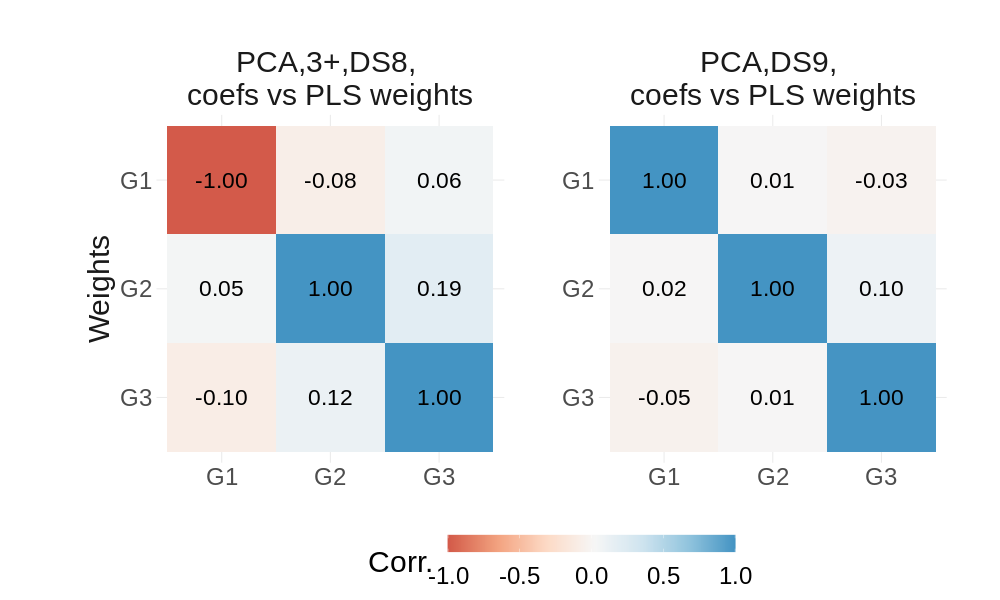

In [107]:
%%R -i corrs_plot -w 1000 -h 600
source("../code/Rplots.R")
plot_corrs(corrs_plot, facetting='')

---

Initial checks

In [ ]:
from sklearn.decomposition import PCA
from brainspace.gradient import GradientMaps

In [267]:
data_dir = "~/rds/rds-cam-psych-transc-Pb9UGUlrwWc/Cam_LIBD/AHBA_data/abagen-data/expression/"
dk_ds8_exp = pd.read_csv(data_dir + 'dk_ds8.csv', index_col=0)[:34]

In [300]:
dk_ds8_exp.head()

,A1BG,ABCA6,ABCA9,ABCC1,ABCC12,ABCC6,ABCC8,ABCG4,ABCG5,ABHD12B,...,ZNRF1,ZRANB3,ZSCAN18,ZSCAN29,ZSCAN31,ZSCAN5A,ZSCAN9,ZSWIM4,ZSWIM9,ZYX
label,,,,,,,,,,,,,,,,,,,,,
1,0.466261,0.502016,0.529000,0.578403,0.588101,0.509327,0.568392,0.564823,0.409405,0.545998,...,0.514137,0.534718,0.546902,0.428955,0.567839,0.465917,0.522364,0.471382,0.530216,0.589163
2,0.621202,0.377459,0.424607,0.310352,0.219332,0.490775,0.257265,0.301345,0.552878,0.456975,...,0.461979,0.477593,0.669603,0.304555,0.229864,0.606767,0.291163,0.339044,0.691170,0.237261
3,0.531708,0.536333,0.545548,0.525847,0.695947,0.519386,0.569550,0.553402,0.715543,0.670401,...,0.480788,0.455645,0.375597,0.725530,0.419257,0.600494,0.479751,0.551378,0.488998,0.599561
4,0.327959,0.765143,0.706637,0.700680,0.282282,0.167629,0.795858,0.646799,0.388741,0.178147,...,0.271263,0.210956,0.138609,0.712863,0.807663,0.237967,0.789104,0.716972,0.196576,0.846857
5,0.708189,0.403196,0.530491,0.349112,0.296955,0.679258,0.082266,0.290737,0.301913,0.227273,...,0.778370,0.482179,0.648434,0.239870,0.246583,0.761889,0.332742,0.255255,0.739295,0.093821


In [275]:
gradients = {}

gradients['normal PCA'] = PCA(n_components=3).fit_transform(dk_ds8_exp)
gradients['brainspace PCA'] = GradientMaps(n_components=3, approach='pca').fit(dk_ds8_exp.values, sparsity=0).gradients_
gradients['brainspace LE'] = GradientMaps(n_components=3, approach='le', kernel='gaussian').fit(dk_ds8_exp.values, sparsity=0).gradients_
gradients['brainspace DM'] = GradientMaps(n_components=3, approach='dm', kernel='gaussian').fit(dk_ds8_exp.values, sparsity=0).gradients_
gradients['brainspace DM sparse9'] = GradientMaps(n_components=3, approach='dm', kernel='gaussian').fit(dk_ds8_exp.values, sparsity=0.9).gradients_

gradients = {name:pd.DataFrame(x, index=dk_ds8_exp.index) for name, x in gradients.items()}

In [256]:
GradientMaps(n_components=3, approach='pca').fit(dk_ds8_exp.values, sparsity=0)

GradientMaps(approach='pca', n_components=3)

In [255]:
gradients['normal PCA'].corrwith(gradients['brainspace PCA'])

0    1.0
1    1.0
2    1.0
dtype: float64

In [193]:
from sklearn.preprocessing import StandardScaler
# X = dk_ds8_exp.apply(lambda x: (x-np.mean(x))/np.std(x))
X = pd.DataFrame(StandardScaler().fit_transform(dk_ds8_exp), index=dk_ds8_exp.index, columns=dk_ds8_exp.columns)
pd.DataFrame(PCA(n_components=3).fit_transform(X), index=test1.expression.index).corrwith(test1.scores)

0    0.997809
1    0.905926
2    0.921803
3         NaN
4         NaN
dtype: float64

In [299]:
test1 = gradientVersion(approach='pca', sparsity=0).fit(dk_ds8_exp)
test1.scores.corrwith(gradients['normal PCA'])
# test2 = gradientsVersion(approach='dm', kernel='gaussian').fit(dk_ds8_exp)
# test1.scores.corrwith(test2.scores)

New gradients version: method=pca, sparsity=0, kernel=None


0    1.0
1    1.0
2    1.0
3    NaN
4    NaN
dtype: float64

In [233]:
expression = dk_ds8_exp
X = expression.dropna(axis=0, how='all').dropna(axis=1, how='any')
X_scaled = StandardScaler().fit_transform(X)
X = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)
X

,A1BG,ABCA6,ABCA9,ABCC1,ABCC12,ABCC6,ABCC8,ABCG4,ABCG5,ABHD12B,...,ZNRF1,ZRANB3,ZSCAN18,ZSCAN29,ZSCAN31,ZSCAN5A,ZSCAN9,ZSWIM4,ZSWIM9,ZYX
label,,,,,,,,,,,,,,,,,,,,,
1,-0.365807,0.121144,0.051853,0.744990,0.538428,0.022767,0.357325,0.493300,-0.731974,0.365481,...,0.261236,0.262040,0.217283,-0.415061,0.526490,-0.179195,0.152176,-0.182877,0.140089,0.452745
2,0.714646,-0.701134,-0.845157,-1.474917,-1.847913,-0.120090,-1.402102,-1.362542,0.361985,-0.192747,...,-0.111977,-0.164265,0.923670,-1.298777,-1.906552,0.997289,-1.416809,-1.220757,1.361449,-1.366220
3,0.090573,0.347689,0.194042,0.309744,1.236313,0.100222,0.363874,0.412854,1.602293,1.145568,...,0.022610,-0.328053,-0.768913,1.691747,-0.543136,0.944886,-0.137006,0.444507,-0.172678,0.506495
4,-1.330235,1.858198,1.578208,1.757651,-1.440556,-2.608428,1.643645,1.070710,-0.889539,-1.941179,...,-1.476631,-2.154096,-2.133243,1.601766,2.252954,-2.083186,1.962332,1.743206,-2.391647,1.784757
5,1.321230,-0.531227,0.064656,-1.153916,-1.345604,1.331301,-2.391722,-1.437257,-1.551594,-1.633129,...,2.151937,-0.130040,0.801802,-1.758280,-1.786190,2.292976,-1.134640,-1.877889,1.726636,-2.107653
6,0.694836,-0.396021,-0.560934,-0.385475,0.246189,0.394506,-0.441730,-0.511775,-1.171025,-0.771201,...,0.918710,0.458169,0.844167,-0.601533,0.023158,0.343678,-0.542255,-0.751201,0.016120,-0.429607
7,-0.933002,0.315280,0.884496,0.458327,0.323775,-0.274067,0.409737,0.630534,-1.021957,-0.218959,...,-0.340653,-0.744990,-0.654127,0.306769,0.602958,-0.562802,0.479058,0.611194,0.198449,0.541961
8,0.617171,-0.617038,-0.673686,-0.581788,0.998272,0.905420,-0.358874,-0.811219,-0.857033,-0.617012,...,1.087938,0.350122,0.899788,-0.563888,-0.196148,0.008365,-0.830012,-0.517176,0.589615,-0.574821
9,-0.923928,0.497427,0.812858,0.364254,-0.992812,0.852781,0.121598,0.572713,-0.144303,-0.525100,...,-1.180991,-0.843960,-0.622514,-0.437046,-0.590856,-0.798292,0.144345,0.649396,0.716298,-0.212568


In [208]:
pcaVersion(dk_ds8_exp).expression

New PCA version


,A1BG,ABCA6,ABCA9,ABCC1,ABCC12,ABCC6,ABCC8,ABCG4,ABCG5,ABHD12B,...,ZNRF1,ZRANB3,ZSCAN18,ZSCAN29,ZSCAN31,ZSCAN5A,ZSCAN9,ZSWIM4,ZSWIM9,ZYX
label,,,,,,,,,,,,,,,,,,,,,
1,-0.365807,0.121144,0.051853,0.744990,0.538428,0.022767,0.357325,0.493300,-0.731974,0.365481,...,0.261236,0.262040,0.217283,-0.415061,0.526490,-0.179195,0.152176,-0.182877,0.140089,0.452745
2,0.714646,-0.701134,-0.845157,-1.474917,-1.847913,-0.120090,-1.402102,-1.362542,0.361985,-0.192747,...,-0.111977,-0.164265,0.923670,-1.298777,-1.906552,0.997289,-1.416809,-1.220757,1.361449,-1.366220
3,0.090573,0.347689,0.194042,0.309744,1.236313,0.100222,0.363874,0.412854,1.602293,1.145568,...,0.022610,-0.328053,-0.768913,1.691747,-0.543136,0.944886,-0.137006,0.444507,-0.172678,0.506495
4,-1.330235,1.858198,1.578208,1.757651,-1.440556,-2.608428,1.643645,1.070710,-0.889539,-1.941179,...,-1.476631,-2.154096,-2.133243,1.601766,2.252954,-2.083186,1.962332,1.743206,-2.391647,1.784757
5,1.321230,-0.531227,0.064656,-1.153916,-1.345604,1.331301,-2.391722,-1.437257,-1.551594,-1.633129,...,2.151937,-0.130040,0.801802,-1.758280,-1.786190,2.292976,-1.134640,-1.877889,1.726636,-2.107653
6,0.694836,-0.396021,-0.560934,-0.385475,0.246189,0.394506,-0.441730,-0.511775,-1.171025,-0.771201,...,0.918710,0.458169,0.844167,-0.601533,0.023158,0.343678,-0.542255,-0.751201,0.016120,-0.429607
7,-0.933002,0.315280,0.884496,0.458327,0.323775,-0.274067,0.409737,0.630534,-1.021957,-0.218959,...,-0.340653,-0.744990,-0.654127,0.306769,0.602958,-0.562802,0.479058,0.611194,0.198449,0.541961
8,0.617171,-0.617038,-0.673686,-0.581788,0.998272,0.905420,-0.358874,-0.811219,-0.857033,-0.617012,...,1.087938,0.350122,0.899788,-0.563888,-0.196148,0.008365,-0.830012,-0.517176,0.589615,-0.574821
9,-0.923928,0.497427,0.812858,0.364254,-0.992812,0.852781,0.121598,0.572713,-0.144303,-0.525100,...,-1.180991,-0.843960,-0.622514,-0.437046,-0.590856,-0.798292,0.144345,0.649396,0.716298,-0.212568


In [143]:
gradients['normal PCA'].corrwith(gradients['brainspace LE'])

# pd.DataFrame(gm.gradients_, index=dk_ds8_exp.index)

0    0.999832
1    0.993733
2    0.980956
dtype: float64

In [1]:
from brainspace.datasets import load_conte69
from brainspace.plotting import plot_hemispheres

In [2]:
surf_lh, surf_rh = load_conte69()

In [ ]:
# plot_hemispheres(surf_lh, surf_rh, size=(800, 200))

In [3]:
from brainspace.datasets import load_group_fc, load_parcellation

In [43]:
labeling = load_parcellation('schaefer', scale=400, join=True)
m = load_group_fc('schaefer', scale=400)

In [8]:
from brainspace.gradient import GradientMaps

In [44]:
gm = GradientMaps(n_components=2, approach='dm', kernel='normalized_angle')
gm.fit(m)

GradientMaps(kernel='normalized_angle', n_components=2)

In [46]:
m.shape

(400, 400)

In [13]:
from brainspace.utils.parcellation import map_to_labels

In [16]:
grad = map_to_labels(gm.gradients_[:, 0], labeling, mask=labeling != 0,fill=np.nan)

(64984,)